In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import wandb
api = wandb.Api()

In [29]:
root = "anands/sparse-rtrl"
names = ["3m5leks6", "wqo4elxi", "m74p6nz2", "z1ok8205", "518lvvia", "xaripc9e", "dj7rjz6p",
         "pg5odwkg", "03gp0bdo", "3xc1llhc"]
sps = []
configs = []

for nn in names:
    run = api.run(f"{root}/{nn}")
    sp = run.history()
    cfg = run.config
    sps.append(sp)
    configs.append(cfg)

In [30]:
configs[0]

{'seed': 5678,
 'steps': 1700,
 'seq_len': 17,
 'cell_type': 'egru',
 'batch_size': 32,
 'hidden_size': 16,
 'learning_rate': 0.003,
 'weight_sparsity': 0,
 'disable_activity_sparsity': False}

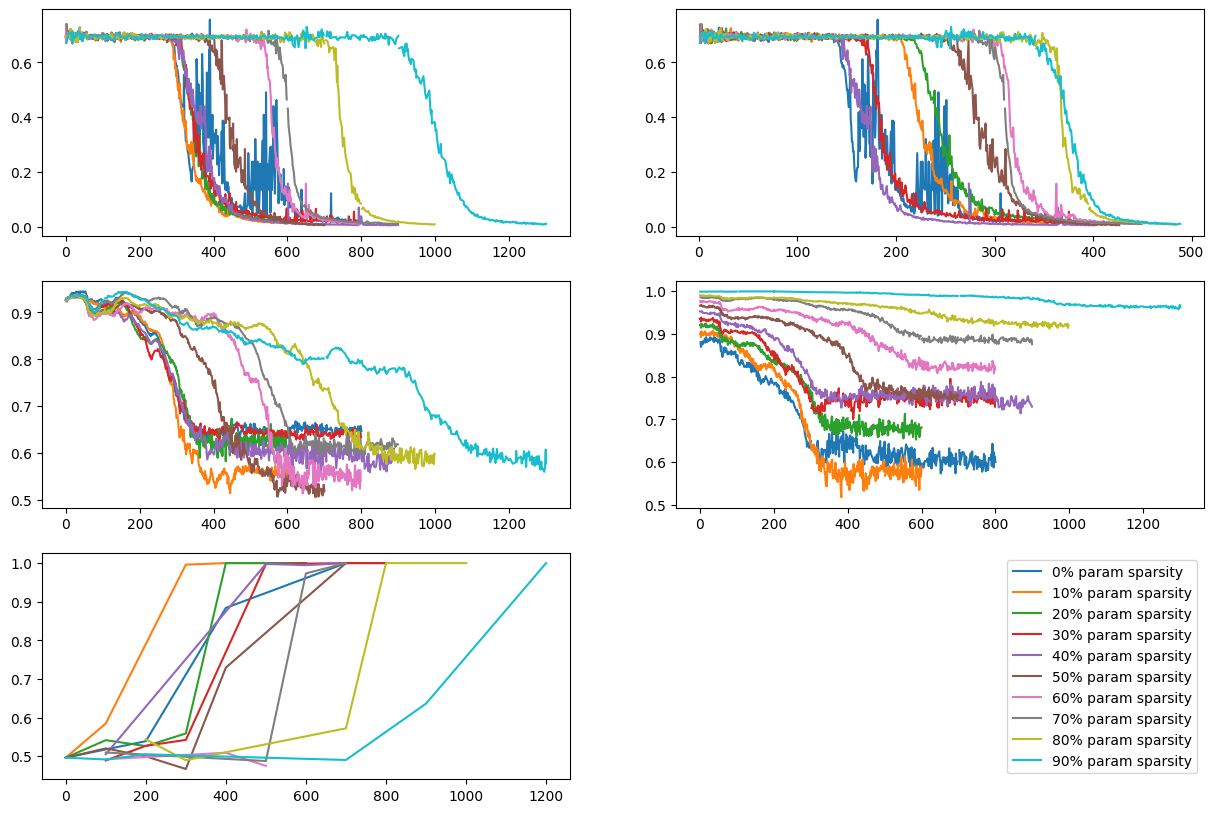

In [41]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
axs = axs.flatten()

ax = axs[0]
for sp, cfg in zip(sps, configs):
    ax.plot(sp['train.step'], sp['train.loss'], label=f'{float(cfg["weight_sparsity"])*100:.0f}% param sparsity')
# ax.legend()

ax = axs[4]
for sp in sps:
    ax.plot(sp['validation.step'][np.isfinite(sp['validation.accuracy'])], sp['validation.accuracy'][np.isfinite(sp['validation.accuracy'])])

ax = axs[2]
for sp in sps:
    ax.plot(sp['train.step'], sp['train.mean_state_sparsity'])

ax = axs[3]
for sp in sps:
    ax.plot(sp['train.step'], sp['train.mean_M_sparsity'])

ax = axs[1]
handles, labels = [], []
for sp, cfg in zip(sps, configs):
    lbl = f'{float(cfg["weight_sparsity"])*100:.0f}% param sparsity'
    hdl = ax.plot(np.cumsum(sp['train.mean_M_sparsity']), sp['train.loss'], label=lbl)
    handles.append(hdl)
    labels.append(lbl)
# ax.legend()

# fig.legend(handles, labels, bbox_to_anchor=(2, 0),loc = 'lower right')

ax = axs[5]
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for sp, cfg in zip(sps, configs):
    ax.plot(0, 0, label=f'{float(cfg["weight_sparsity"])*100:.0f}% param sparsity')
ax.legend()

In [5]:
sp90['train.step']

0        13.0
1        20.0
2        21.0
3        22.0
4        24.0
        ...  
500    1669.0
501    1684.0
502    1685.0
503    1690.0
504    1694.0
Name: train.step, Length: 505, dtype: float64

In [6]:
sp90['train.M_sparsity']

0      {'_type': 'histogram', 'bins': [0.763427734375...
1      {'_type': 'histogram', 'bins': [0.760823607444...
2      {'_type': 'histogram', 'bins': [0.765625, 0.77...
3      {'_type': 'histogram', 'bins': [0.763265013694...
4      {'_type': 'histogram', 'bins': [0.761556029319...
                             ...                        
500    {'bins': [0.36328125, 0.3831787109375, 0.40307...
501    {'bins': [0.3779296875, 0.397369384765625, 0.4...
502    {'_type': 'histogram', 'bins': [0.193603515625...
503    {'_type': 'histogram', 'bins': [0.243570968508...
504    {'_type': 'histogram', 'bins': [0.191487640142...
Name: train.M_sparsity, Length: 505, dtype: object

In [10]:
np.cumsum(sp90['train.mean_M_sparsity'])

0        0.883861
1        1.767541
2        2.652373
3        3.535736
4        4.418860
          ...    
500    315.786787
501    316.389435
502    316.972705
503    317.544099
504    318.122667
Name: train.mean_M_sparsity, Length: 505, dtype: float64

In [8]:
losses, steps = [], []
psp = 0.9
for ss, ls, asp, msp in zip(sp90['train.step'], sp90['train.loss'], sp90['train.mean_state_sparsity'], sp90['train.mean_M_sparsity']):
    print(ss, ls, asp, msp)
    losses.append(ls)
    steps.append()

13.0 0.7228262424468994 0.9345128536224365 0.7855374813079834
0.7073845616042951 0.7855374813079834


In [35]:
sp90['validation.accuracy'][np.isfinite(sp90['validation.accuracy'])]

25     0.496000
50     0.496000
200    0.496000
357    0.644667
451    1.000000
Name: validation.accuracy, dtype: float64